# 2.6 비교, 마스크 부울 로직

In [1]:
import numpy as np
import pandas as pd
#Pandas를 이용해 인치 단위의 강수량 데이터를 Numpy 배열로 추출
rainfall = pd.read_csv('Seattle2014.csv')['PRCP'].values
inches = rainfall / 254 #1/10mm -> inches
inches.shape

(365,)

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # 플롯 형식 설정

(array([245.,  14.,  13.,  17.,   8.,   6.,   5.,   6.,   4.,   3.,   7.,
          6.,   3.,   3.,   3.,   4.,   4.,   2.,   4.,   0.,   0.,   1.,
          1.,   1.,   0.,   0.,   0.,   2.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.04596457, 0.09192913, 0.1378937 , 0.18385827,
        0.22982283, 0.2757874 , 0.32175197, 0.36771654, 0.4136811 ,
        0.45964567, 0.50561024, 0.5515748 , 0.59753937, 0.64350394,
        0.6894685 , 0.73543307, 0.78139764, 0.8273622 , 0.87332677,
        0.91929134, 0.96525591, 1.01122047, 1.05718504, 1.10314961,
        1.14911417, 1.19507874, 1.24104331, 1.28700787, 1.33297244,
        1.37893701, 1.42490157, 1.47086614, 1.51683071, 1.56279528,
        1.60875984, 1.65472441, 1.70068898, 1.74665354, 1.79261811,
        1.83858268]),
 <BarContainer object of 40 artists>)

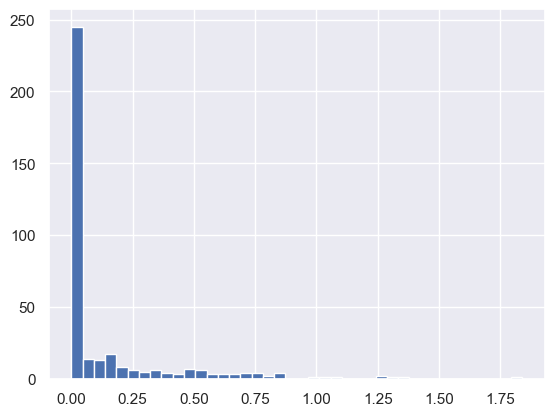

In [7]:
plt.hist(inches, 40)

In [9]:
x = np.array([1, 2, 3, 4, 5])

In [18]:
x < 3  # less than, 비교연산자의 결과는 항상 부울 타입의 배열, np.less(x,3)

array([ True,  True, False, False, False])

In [16]:
(2*x) == (x**2)

array([False,  True, False, False, False])

In [20]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [24]:
#true의 요소의 개수 세기
np.count_nonzero(x<6)

8

In [30]:
#위와 똑같은 방법
np.sum(x<6) #true면 1이라서 모두 더하면 8임 , axis를 정해줘서 행이나 열을 따라 계산 가능

8

In [36]:
np.any(x>8) #특정축 가능

True

In [38]:
np.all(x<10) #마찬가지임

True

In [40]:
# & - np.bitwise_and
# | - np.bitwise_or
# ^ - np.bitwise_xor
# ~ - np.bitwise_not

In [42]:
print("Number days without rain:      ", np.sum(inches == 0))
print("Number days with rain:         ", np.sum(inches != 0))
print("Days with more than 0.5 inches:", np.sum(inches > 0.5))
print("Rainy days with < 0.2 inches  :", np.sum((inches > 0) &
                                                (inches < 0.2)))

Number days without rain:       215
Number days with rain:          150
Days with more than 0.5 inches: 37
Rainy days with < 0.2 inches  : 75


In [44]:
#배열에서 조건에 맞는 값들을 선택
x[x<5]

array([0, 3, 3, 3, 2, 4])

In [46]:
#비가 온 날에 대한 마스크 생성
rainy = (inches > 0)

#여름에 해당하는 날에 대한 마스크 생성(6월 21일은 172번째 날임)
days = np.arange(365)
summer = (days > 172) & (days < 262)

print("Median precip on rainy days in 2014 (inches):   ",
      np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches):  ",
      np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches): ",
      np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches):",
      np.median(inches[rainy & ~summer]))

Median precip on rainy days in 2014 (inches):    0.19488188976377951
Median precip on summer days in 2014 (inches):   0.0
Maximum precip on summer days in 2014 (inches):  0.8503937007874016
Median precip on non-summer rainy days (inches): 0.20078740157480315


In [48]:
# and, or은 전체 객체의 참과 거짓을 측정
# &, |은 각 객체의 비트를 참조함

# 2.7 팬시 인덱싱

In [51]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [53]:
[x[3], x[7], x[2]]

[71, 86, 14]

In [55]:
ind = [3,7,2]
x[ind]

array([71, 86, 14])

In [61]:
ind = np.array([[3, 7], 
                [4, 5]]) #팬시 인덱싱을 이용하면 결과의 형상이 인덱싱 대상 배열의 형상이 아니라 인덱스 배열의 형상을 반영
x[ind]

array([[71, 86],
       [60, 20]])

In [59]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [63]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col] #첫번째 인덱스는 행, 두번째는 열

array([ 2,  5, 11])

In [71]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [69]:
row[:, np.newaxis] #np.newaxis는 차원을 늘려준다

array([[0],
       [1],
       [2]])

In [73]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

In [75]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [77]:
X[1:, [2, 0, 1]] #0행말고 1행부터 시작, 그리고 각 행마다 인덱스 2,0,1을 추출한다.

array([[ 6,  4,  5],
       [10,  8,  9]])

In [81]:
mask = np.array([1, 0, 1, 0], dtype=bool) #팬시 인덱싱과 마스킹 결합
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [83]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

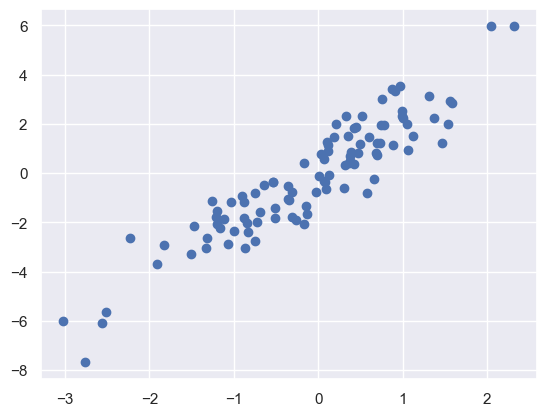

In [87]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  #플롯 스타일 설정

plt.scatter(X[:, 0], X[:, 1]);

In [93]:
indices = np.random.choice(X.shape[0], 20, replace=False) #반복 없이 임의로 인덱스를 20개 선택
indices

array([27, 24, 81, 42, 60, 23, 19, 47, 61, 39, 78, 12,  4, 66, 46, 44, 34,
       52, 54, 88])

In [91]:
selection = X[indices]  #여기에 팬시 인덱싱 사용
selection.shape

(20, 2)

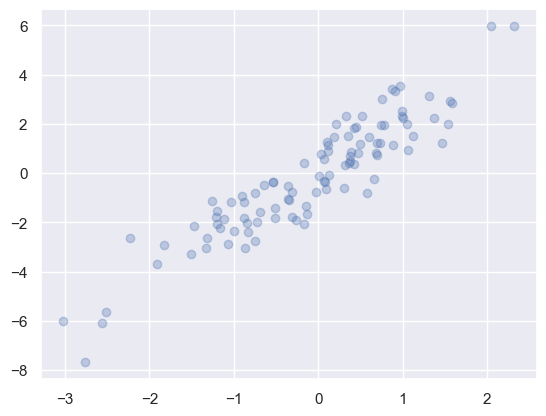

In [97]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1],facecolor='none', s=200)

In [99]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [101]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


In [103]:
x = np.zeros(10)
x[[0, 0]] = [4, 6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [132]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1 #x[i]+1이 평가되고 나면 결과가 x의 인덱스에 할당, 이 점을 생각하면 그것은 여러 차례 일어나는 증가가 아니라 할당이므로 보기와는 다른 결과 일으킴
x

array([0., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

In [134]:
x = np.zeros(10)
np.add.at(x, i, 1) #at메서드는 지정한 값을 가진 특정 인덱스(여기에서 i)에 해당하는 연산자를 즉시 적용함
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


In [121]:
np.random.seed(42)
x = np.random.randn(100)

#직접 히스토그램 계산하기
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

#각 x에 대한 적절한 구간 찾기
i = np.searchsorted(bins, x)

#각 구간에 1 더하기
np.add.at(counts, i, 1)

(array([ 0.,  0.,  0.,  0.,  1.,  3.,  7.,  9., 23., 22., 17., 10.,  7.,
         1.,  0.,  0.,  0.,  0.,  0.]),
 array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
        -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
         0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
         2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ]),
 [<matplotlib.patches.Polygon at 0x2499d5777d0>])

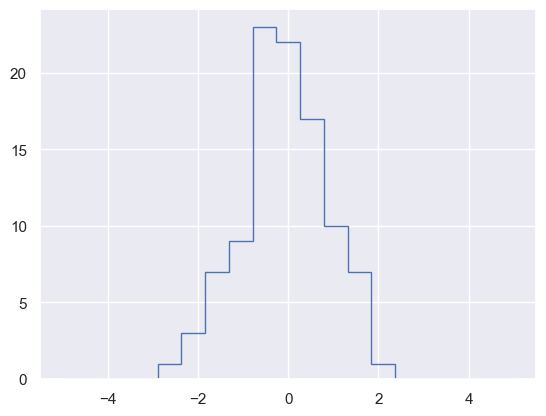

In [125]:
plt.hist(x, bins, histtype='step')

# 2.8 배열 정렬

In [138]:
x = np.array([2, 1, 4, 3, 5]) #sorted함수와 유사
np.sort(x)

array([1, 2, 3, 4, 5])

In [140]:
x.sort()
print(x)

[1 2 3 4 5]


In [144]:
x = np.array([2, 1, 4, 3, 5]) #정렬된 상태에서 원래 인덱스를 반환
i = np.argsort(x)
print(i)

[1 0 3 2 4]


In [146]:
x[i] #팬시 인덱싱 사용 

array([1, 2, 3, 4, 5])

In [148]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [150]:
#X의 각 열을 정렬
np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [152]:
#X의 각 행을 정렬
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

In [164]:
#단순히 배열에서 K개의 가장 작은 값을 찾기 -> np.partition
#반환된 파티션의 왼쪽에 K개의 가장 작은 값, 오른쪽에는 나머지 값이 임의의 순서로 채워짐
#두 파티션 내의 요소는 임의의 순서를 가짐
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3) #3개의 작은 element가 왼쪽에 배치

array([2, 1, 3, 4, 6, 5, 7])

In [156]:
np.partition(X, 2, axis=1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

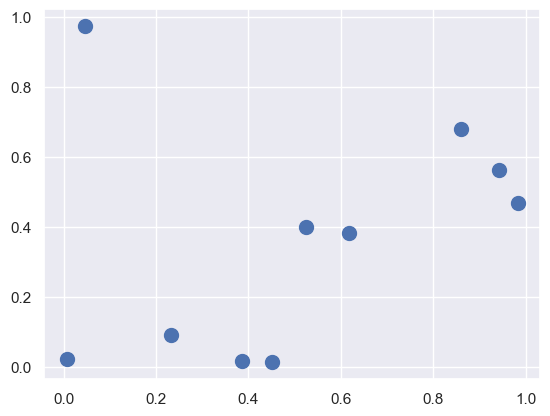

In [166]:
X = rand.rand(10, 2)

import matplotlib.pyplot as plt
import seaborn; seaborn.set() # Plot styling
plt.scatter(X[:, 0], X[:, 1], s=100);

In [168]:
dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=-1)

In [170]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [172]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 3 9 7 1 4 2 5 6 8]
 [1 4 7 9 3 6 8 5 0 2]
 [2 1 4 6 3 0 8 9 7 5]
 [3 9 7 0 1 4 5 8 6 2]
 [4 1 8 5 6 7 9 3 0 2]
 [5 8 6 4 1 7 9 3 2 0]
 [6 8 5 4 1 7 9 3 2 0]
 [7 9 3 1 4 0 5 8 6 2]
 [8 5 6 4 1 7 9 3 2 0]
 [9 7 3 0 1 4 5 8 6 2]]


In [174]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

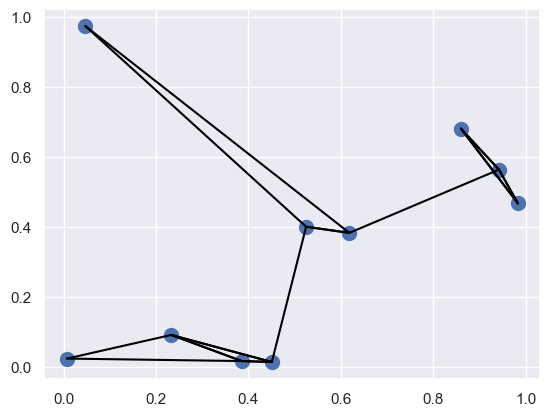

In [176]:
plt.scatter(X[:, 0], X[:, 1], s=100)

# draw lines from each point to its two nearest neighbors
K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(X[j], X[i]), color='black')

# 2.9 구조화된 데이터 : Numpy의 구조화된 배열

In [179]:
name = ['Alice', 'Bob', 'Cathy', 'Doug']
age = [25, 45, 37, 19]
weight = [55.0, 85.5, 68.0, 61.5]

In [181]:
x = np.zeros(4, dtype=int)

In [185]:
#구조화된 배열을 위해 지정함으로써 구조화된 배열을 만들 수 있음
data = np.zeros(4, dtype={'names':('name', 'age', 'weight'),
                          'formats':('U10', 'i4', 'f8')})
print(data.dtype)

[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')]


In [187]:
#빈 컨테이너 배열을 만들었으니 배열에 값 리스트를 채우기
data['name'] = name
data['age'] = age
data['weight'] = weight
print(data)

[('Alice', 25, 55. ) ('Bob', 45, 85.5) ('Cathy', 37, 68. )
 ('Doug', 19, 61.5)]


In [189]:
# Get all names
data['name']

array(['Alice', 'Bob', 'Cathy', 'Doug'], dtype='<U10')

In [191]:
# Get first row of data
data[0]

('Alice', 25, 55.)

In [193]:
# Get the name from the last row
data[-1]['name']

'Doug'

In [195]:
#나이가 30살 이하인 이름 가져오기
data[data['age'] < 30]['name']

array(['Alice', 'Doug'], dtype='<U10')

In [197]:
tp = np.dtype([('id', 'i8'), ('mat', 'f8', (3, 3))])
X = np.zeros(1, dtype=tp)
print(X[0])
print(X['mat'][0])

(0, [[0., 0., 0.], [0., 0., 0.], [0., 0., 0.]])
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [199]:
data['age']

array([25, 45, 37, 19])

In [201]:
data_rec = data.view(np.recarray)
data_rec.age

array([25, 45, 37, 19])

In [203]:
%timeit data['age']
%timeit data_rec['age']
%timeit data_rec.age

276 ns ± 10.9 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
3.94 μs ± 327 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
9.56 μs ± 610 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


# 3.2 Pandas 객체 소개

In [207]:
import pandas as pd

In [212]:
data = pd.Series([0.25, 0.5, 0.75, 1.0]) #Series는 인덱싱된 데이터의 1차원 배열
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [218]:
data.values #Series는 일련의 값과 인덱스를 모두 감쌈

array([0.25, 0.5 , 0.75, 1.  ])

In [216]:
data.index

RangeIndex(start=0, stop=4, step=1)

In [220]:
data[1:3]

1    0.50
2    0.75
dtype: float64

In [224]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],index=['a', 'b', 'c', 'd']) #인덱스가 정수일 필요 없고 어떤 타입의 값으로도 구성할 수 있음
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [226]:
data['b']

0.5

In [234]:
population_dict = {'California': 38332521,'Texas': 26448193,'New York': 19651127,'Florida': 19552860,'Illinois': 12882135}
population = pd.Series(population_dict) #Series는 인덱스가 정렬된 키에서 추출되는 경우에 생성
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [232]:
population['California':'Illinois'] #딕셔너리와 다르게 슬라이싱 지원

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [236]:
#Series객체 구성하기

In [238]:
pd.Series([2, 4, 6])

0    2
1    4
2    6
dtype: int64

In [244]:
pd.Series({2:'a', 1:'b', 3:'c'}) #기본적으로 딕셔너리 키를 정렬해서 취함

2    a
1    b
3    c
dtype: object

In [242]:
pd.Series({2:'a', 1:'b', 3:'c'}, index=[3, 2])

3    c
2    a
dtype: object

In [246]:
#DataFrame 객체
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [248]:
states = pd.DataFrame({'population': population,
                       'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [252]:
states.index #DataFrame도 인덱스 레이블에 접근할 수 있는 index 속성을 가짐

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [256]:
states.columns #열 레이블을 가지고 있는 index 객체인 column 속성 가짐

Index(['population', 'area'], dtype='object')

In [260]:
states['area'] #원래 2차원 array에서 states[0]을 하면 행을 반환하지만 여기서는 열을 반환함

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [264]:
pd.DataFrame(population, columns=['population'])

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


In [266]:
data = [{'a': i, 'b': 2 * i}
        for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


In [270]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}]) #NaN은 숫자가 아님을 의미함

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


In [272]:
pd.DataFrame({'population': population,
              'area': area})

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [274]:
pd.DataFrame(np.random.rand(3, 2),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])

,foo,bar
a,0.417411,0.222108
b,0.119865,0.337615
c,0.942910,0.323203


In [276]:
#Index 객체
ind = pd.Index([2, 3, 5, 7, 11])
ind

Index([2, 3, 5, 7, 11], dtype='int64')

In [278]:
ind[::2]

Index([2, 5, 11], dtype='int64')

In [280]:
ind[1]=0

TypeError: Index does not support mutable operations

In [282]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

In [284]:
indA & indB  # intersection

Index([0, 3, 5, 7, 9], dtype='int64')

In [286]:
indA | indB  # union

Index([3, 3, 5, 7, 11], dtype='int64')

In [288]:
indA ^ indB  # symmetric difference

Index([3, 0, 0, 0, 2], dtype='int64')